#### M6_Challenge_KonradK_san_francisco_housing.ipynb
# Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
---

# Housing Rental Analysis for San Francisco

In this challenge, your job is to use your data visualization superpowers, including aggregation, interactive visualizations, and geospatial analysis, to find properties in the San Francisco market that are viable investment opportunities.

Instructions:

Use the `san_francisco_housing.ipynb` notebook to visualize and analyze the real-estate data.

Note that this assignment requires you to create a visualization by using the integration between Plotly and the Mapbox API. Be sure to create your environment file (`.env`) and include your Mapbox API access token. Then import your Mapbox API access token into the `san_francisco_housing.ipynb` notebook, and set it by using the `px.set_mapbox_access_token` function.

Additionally, you need to read the `sfo_neighborhoods_census_data.csv` file from the `Resources` folder into the notebook and create the DataFrame that you’ll use in the analysis.

The main task in this Challenge is to visualize and analyze the real-estate data in your Jupyter notebook. Use the `san_francisco_housing.ipynb` notebook to complete the following tasks:

* Calculate and plot the housing units per year.

* Calculate and plot the average prices per square foot.

* Compare the average prices by neighborhood.

* Build an interactive neighborhood map.

* Compose your data story.

##### Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?

##### Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?

##### Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

##### Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with Plotly and the Mapbox API. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

5. Style and format the line plot to ensure a professionally styled visualization.

6. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with the Mapbox API.](Images/mapbox-plot.png)

7. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?

##### Compose Your Data Story

Based on the visualizations that you created, answer the following questions:

* How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

* What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

In [119]:
# Import the required libraries and dependencies
import os
import pandas as pd
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import numpy as np
import scipy
import pylab


import holoviews as hv
from holoviews import dim, opts

## Enable your Mapbox API access token

In [2]:
# Load the .env file into the notebook
load_dotenv()

# Read in your MAPBOX_API_KEY
mapbox_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm the availability of your Mapbox API access token by checking its type
if not mapbox_api_access_token:
    print("Error with the Mapbox API access token. Check the .env file. -k")
    
# Set your Mapbox API access token
px.set_mapbox_access_token(mapbox_api_access_token)


## Import the data 

In [3]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(
    Path("./Resources/sfo_neighborhoods_census_data.csv")
).drop_duplicates()

# Review the first and last five rows of the DataFrame
display(sfo_data_df.head())
display(sfo_data_df.tail())

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390
396,2016,Westwood Park,631.195426,384242,4390


---

## Calculate and Plot the Housing Units per Year

For this part of the assignment, use numerical and visual aggregation to calculate the number of housing units per year, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

2. Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

3. Style and format the line plot to ensure a professionally styled visualization.

4. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting bar chart.](Images/zoomed-housing-units-by-year.png)

5. Answer the following question:

    * What’s the overall trend in housing units over the period that you’re analyzing?



### Step 1: Use the `groupby` function to group the data by year. Aggregate the results by the `mean` of the groups.

In [7]:
# Create a numerical aggregation that groups the data by the year and then averages the results.
housing_units_by_year = sfo_data_df.drop(columns=['sale_price_sqr_foot','gross_rent']).groupby('year').mean()

# Review the DataFrame
housing_units_by_year


,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


### Step 2: Use the `hvplot` function to plot the `housing_units_by_year` DataFrame as a bar chart. Make the x-axis represent the `year` and the y-axis represent the `housing_units`.

### Step 3: Style and format the line plot to ensure a professionally styled visualization.

In [5]:
# Create a visual aggregation explore the housing units by year
plot_housing_units_by_year = housing_units_by_year.hvplot.bar(
    title ='Total Housing Units San in Francisco - 2010 to 2016',
    color="blue",
    hover_color = "orange",
    xlabel='year',
    ylabel="housing_units",
    ylim=(365000, 386000),
    rot=0
).opts(yformatter='%.0f')


# Visualize the plot
plot_housing_units_by_year


:Bars   [year]   (housing_units)

### Step 5: Answer the following question:

**Question** What is the overall trend in housing_units over the period being analyzed?

> ### **Answer** 
>> # Steady and stable year-over-year growth of approx. XX.XXX% (avg.).


>> pct_change


---

## Calculate and Plot the Average Sale Prices per Square Foot

For this part of the assignment, use numerical and visual aggregation to calculate the average prices per square foot, and then visualize the results as a bar chart. To do so, complete the following steps:

1. Group the data by year, and then average the results. What’s the lowest gross rent that’s reported for the years that the DataFrame includes?

2. Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

3. Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

    > **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/avg-sale-px-sq-foot-gross-rent.png)

6. Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

    * Did any year experience a drop in the average sale price per square foot compared to the previous year?

    * If so, did the gross rent increase or decrease during that year?



### Step 1: Group the data by year, and then average the results.

In [8]:
display(sfo_data_df.tail())

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390
396,2016,Westwood Park,631.195426,384242,4390


In [9]:
# Create a numerical aggregation by grouping the data by year and averaging the results
prices_square_foot_by_year = sfo_data_df.groupby('year').mean()

# year	neighborhood	sale_price_sqr_foot	 housing_units	gross_rent
# Review the resulting DataFrame
prices_square_foot_by_year

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


**Question** What is the lowest gross rent reported for the years included in the DataFrame?

> **Answer** 
>> # year  gross_rent
>> # 2010	1239

### Step 2: Create a new DataFrame named `prices_square_foot_by_year` by filtering out the “housing_units” column. The new DataFrame should include the averages per year for only the sale price per square foot and the gross rent.

In [10]:
# Filter out the housing_units column, creating a new DataFrame 
# Keep only sale_price_sqr_foot and gross_rent averages per year
# prices_square_foot_by_year = prices_square_foot_by_year.drop(columns=['neighborhood','housing_units']).groupby('year').mean()
prices_square_foot_by_year = prices_square_foot_by_year.drop(columns=['housing_units']).groupby('year').mean()


# Review the DataFrame
prices_square_foot_by_year


,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


### Step 3: Use hvPlot to plot the `prices_square_foot_by_year` DataFrame as a line plot.

> **Hint** This single plot will include lines for both `sale_price_sqr_foot` and `gross_rent`

### Step 4: Style and format the line plot to ensure a professionally styled visualization.


In [11]:
# Plot prices_square_foot_by_year. 
# Inclued labels for the x- and y-axes, and a title.
# YOUR CODE HERE
prices_square_foot_by_year.hvplot.line(
    ylabel='Sale Price per sf // Gross Rent',
    xlabel='Year',
    title="Prices per Square Foot and Average Gross Rent - 2010 to 2016"
)


:NdOverlay   [Variable]
   :Curve   [year]   (value)

### Step 6: Use both the `prices_square_foot_by_year` DataFrame and interactive plots to answer the following questions:

**Question** * Did any year experience a drop in the average sale price per square foot compared to the previous year?

> **Answer** 
>> # YES 
>>> ## 2010	-- 369.344353 -- 1239
>>> ## 2011	-- 341.903429 -- 1530

**Question** * If so, did the gross rent increase or decrease during that year?I


> **Answer** 
>> # Gross Rents increased by XX.XXX%.
>>> ## 2010	-- 369.344353 -- 1239
>>> ## 2011	-- 341.903429 -- 1530

---

## Compare the Average Sale Prices by Neighborhood

For this part of the assignment, use interactive visualizations and widgets to explore the average sale price per square foot by neighborhood. To do so, complete the following steps:

1. Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

2. Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

3. Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

4. Style and format the line plot to ensure a professionally styled visualization.

5. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of the resulting plot.](Images/pricing-info-by-neighborhood.png)

6. Use the interactive visualization to answer the following question:

    * For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 


### Step 1: Create a new DataFrame that groups the original DataFrame by year and neighborhood. Aggregate the results by the `mean` of the groups.

In [39]:
display(sfo_data_df.head())
display(sfo_data_df.tail())

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390
396,2016,Westwood Park,631.195426,384242,4390


In [95]:
# Group by year and neighborhood and then create a new dataframe of the mean values
prices_by_year_by_neighborhood = (
    sfo_data_df.groupby(['year', 'neighborhood'])
    .mean()
    .sort_values('year')
)


# year	neighborhood	sale_price_sqr_foot	 housing_units	gross_rent
# Review the resulting DataFrame
prices_by_year_by_neighborhood

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                   
2010 Alamo Square              291.182945         372560        1239
     Mission Bay               489.805378         372560        1239
     Mission Dolores           257.987999         372560        1239
     Mission Terrace           262.876026         372560        1239
     Nob Hill                  307.677477         372560        1239
...                                   ...            ...         ...
2016 Inner Parkside            518.112650         384242        4390
     Inner Richmond            403.311132         384242        4390
     Inner Sunset              445.923828         384242        4390
     Excelsior                 534.226250         384242        4390
     Westwood Park             631.195426         384242        4390

[397 rows x 3 columns]

### Step 2: Filter out the “housing_units” column to create a DataFrame that includes only the `sale_price_sqr_foot` and `gross_rent` averages per year.

In [96]:
# Filter out the housing_units
prices_by_year_by_neighborhood = prices_by_year_by_neighborhood.drop(columns=['housing_units'])

# Review the first and last five rows of the DataFrame
prices_by_year_by_neighborhood


sale_price_sqr_foot  gross_rent
year neighborhood                                    
2010 Alamo Square              291.182945        1239
     Mission Bay               489.805378        1239
     Mission Dolores           257.987999        1239
     Mission Terrace           262.876026        1239
     Nob Hill                  307.677477        1239
...                                   ...         ...
2016 Inner Parkside            518.112650        4390
     Inner Richmond            403.311132        4390
     Inner Sunset              445.923828        4390
     Excelsior                 534.226250        4390
     Westwood Park             631.195426        4390

[397 rows x 2 columns]

### Step 3: Create an interactive line plot with hvPlot that visualizes both `sale_price_sqr_foot` and `gross_rent`. Set the x-axis parameter to the year (`x="year"`). Use the `groupby` parameter to create an interactive widget for `neighborhood`.

### Step 4: Style and format the line plot to ensure a professionally styled visualization.

In [135]:
# Use hvplot to create an interactive line plot of the average price per square foot
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE
prices_by_year_by_neighborhood.hvplot.line(
    groupby='neighborhood',
    ylabel='Sale Price per sf // Gross Rent',
    xlabel='Year',
    figsize=(15, 8),
    title="Sales Price per Square Foot and Average Gross Rent - 2010 to 2016 (by Neighborhood)"
).opts(
    xformatter='%.0f'
)



:DynamicMap   [neighborhood]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

### Step 6: Use the interactive visualization to answer the following question:

**Question** For the Anza Vista neighborhood, is the average sale price per square foot for 2016 more or less than the price that’s listed for 2012? 

## **Answer** 
# For the Anza Vista neighborhood, the sale price in per square foot in 2012 was 344.49. The averages sale price per square foot in 2016 was 88.40. The average sale price per square foot is lower in 2016 than it was in 2012.

---

## Build an Interactive Neighborhood Map

For this part of the assignment, explore the geospatial relationships in the data by using interactive visualizations with Plotly and the Mapbox API. To build your map, use the `sfo_data_df` DataFrame (created during the initial import), which includes the neighborhood location data with the average prices. To do all this, complete the following steps:

1. Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

2. Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

3. Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. The second cell cleans the data and sets the “Neighborhood” column. Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

4. Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.

    * Set the `color` parameter to “gross_rent”.

    * Set the `size_max` parameter to “25”.

    * Set the `zoom` parameter to “11”.

5. Style and format the line plot to ensure a professionally styled visualization.

6. Note that your resulting plot should appear similar to the following image:

![A screenshot depicts an example of a scatter plot created with the Mapbox API.](Images/mapbox-plot.png)

7. Use the interactive map to answer the following question:

    * Which neighborhood has the highest gross rent, and which has the highest sale price per square foot?



### Step 1: Read the `neighborhood_coordinates.csv` file from the `Resources` folder into the notebook, and create a DataFrame named `neighborhood_locations_df`. Be sure to set the `index_col` of the DataFrame as “Neighborhood”.

In [132]:
# Load neighborhoods coordinates data
neighborhood_locations_df = pd.read_csv(
    Path("./Resources/neighborhoods_coordinates.csv"),
    index_col="Neighborhood"
)

# Review the DataFrame
display(neighborhood_locations_df.head())
display(neighborhood_locations_df.tail())

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


,Lat,Lon
Neighborhood,,
West Portal,37.74026,-122.463880
Western Addition,37.79298,-122.435790
Westwood Highlands,37.73470,-122.456854
Westwood Park,37.73415,-122.457000
Yerba Buena,37.79298,-122.396360


### Step 2: Using the original `sfo_data_df` Dataframe, create a DataFrame named `all_neighborhood_info_df` that groups the data by neighborhood. Aggregate the results by the `mean` of the group.

In [139]:
# Calculate the mean values for each neighborhood
all_neighborhood_info_df = (
    sfo_data_df
    .groupby('neighborhood')
    .mean()
)

# Review the resulting DataFrame
display(all_neighborhood_info_df.head())
display(all_neighborhood_info_df.tail())


,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Alamo Square,2013.000000,366.020712,378401.0,2817.285714
Anza Vista,2013.333333,373.382198,379050.0,3031.833333
Bayview,2012.000000,204.588623,376454.0,2318.400000
Bayview Heights,2015.000000,590.792839,382295.0,3739.000000
Bernal Heights,2013.500000,576.746488,379374.5,3080.333333


,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
West Portal,2012.25,498.488485,376940.75,2515.500000
Western Addition,2012.50,307.562201,377427.50,2555.166667
Westwood Highlands,2012.00,533.703935,376454.00,2250.500000
Westwood Park,2015.00,687.087575,382295.00,3959.000000
Yerba Buena,2012.50,576.709848,377427.50,2555.166667


### Step 3: Review the two code cells that concatenate the `neighborhood_locations_df` DataFrame with the `all_neighborhood_info_df` DataFrame. 

Note that the first cell uses the [Pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) to create a DataFrame named `all_neighborhoods_df`. 

The second cell cleans the data and sets the “Neighborhood” column. 

Be sure to run these cells to create the `all_neighborhoods_df` DataFrame, which you’ll need to create the geospatial visualization.

In [140]:
# Using the Pandas `concat` function, join the 
# neighborhood_locations_df and the all_neighborhood_info_df DataFrame
# The axis of the concatenation is "columns".
# The concat function will automatially combine columns with
# identical information, while keeping the additional columns.
all_neighborhoods_df = pd.concat(
    [neighborhood_locations_df, all_neighborhood_info_df], 
    axis="columns",
    sort=False
)

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())


,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.0,2817.285714
Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.0,3031.833333
Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.0,2318.400000
Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.0,3739.000000
Bernal Heights,37.728630,-122.443050,NaN,NaN,NaN,NaN


,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
Yerba Buena,37.79298,-122.39636,2012.5,576.709848,377427.5,2555.166667
Bernal Heights,NaN,NaN,2013.5,576.746488,379374.5,3080.333333
Downtown,NaN,NaN,2013.0,391.434378,378401.0,2817.285714
Ingleside,NaN,NaN,2012.5,367.895144,377427.5,2509.000000
Outer Richmond,NaN,NaN,2013.0,473.900773,378401.0,2817.285714


In [141]:
# Call the dropna function to remove any neighborhoods that do not have data
all_neighborhoods_df = all_neighborhoods_df.reset_index().dropna()

# Rename the "index" column as "Neighborhood" for use in the Visualization
all_neighborhoods_df = all_neighborhoods_df.rename(columns={"index": "Neighborhood"})

# Review the resulting DataFrame
display(all_neighborhoods_df.head())
display(all_neighborhoods_df.tail())

,Neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.0,3739.000000
5,Buena Vista Park,37.768160,-122.439330,2012.833333,452.680591,378076.5,2698.833333


,Neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
68,West Portal,37.74026,-122.463880,2012.25,498.488485,376940.75,2515.500000
69,Western Addition,37.79298,-122.435790,2012.50,307.562201,377427.50,2555.166667
70,Westwood Highlands,37.73470,-122.456854,2012.00,533.703935,376454.00,2250.500000
71,Westwood Park,37.73415,-122.457000,2015.00,687.087575,382295.00,3959.000000
72,Yerba Buena,37.79298,-122.396360,2012.50,576.709848,377427.50,2555.166667


### Step 4: Using Plotly Express, create a `scatter_mapbox` for the `all_neighborhoods_df` DataFrame. Remember that you need your MapBox API key. Be sure to do the following:

    * Set the `size` parameter to “sale_price_sqr_foot”.
    * Set the `color` parameter to “gross_rent”.
    * Set the `size_max` parameter to “25”.
    * Set the `zoom` parameter to “11”.

### Step 5: Style and format the line plot to ensure a professionally styled visualization.


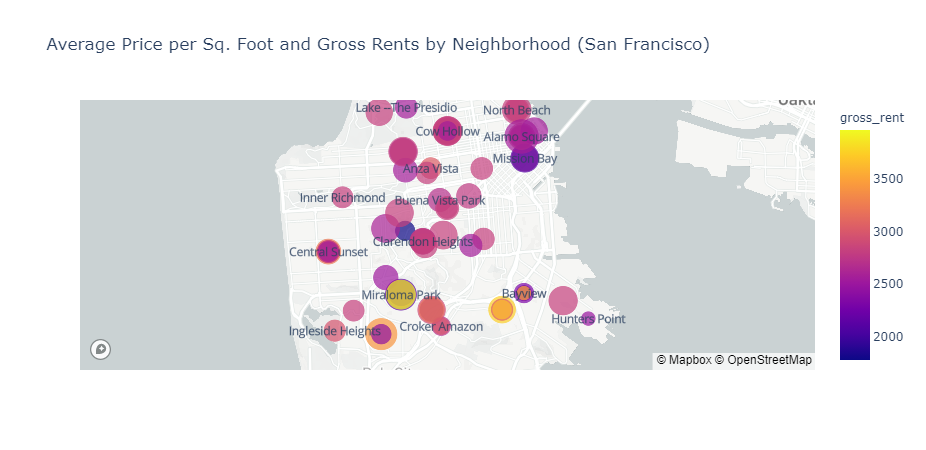

In [158]:
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE
px.scatter_mapbox(
    all_neighborhoods_df,
    text='Neighborhood',
    lat='Lat',
    lon='Lon',
    size='sale_price_sqr_foot',
    color='gross_rent',
    size_max=25,
    zoom=11,
    title='Average Price per Sq. Foot and Gross Rents by Neighborhood (San Francisco)'
)

### Step 7: Use the interactive map to answer the following question:

**Question** Which neighborhood has the highest gross rent (color), and which has the highest sale price per square foot (size)?

## **Answer** 
### Highest Gross Rent (color)
> # Westwood Park: `$3959/mo`

### Highest Price per sf (size)
> # Union Square Dist.: `$903.99/sf`

In [168]:
# Confirm the answers
display(all_neighborhoods_df.max())

Neighborhood           Yerba Buena
Lat                        37.8015
Lon                       -122.372
year                          2015
sale_price_sqr_foot        903.993
housing_units               382295
gross_rent                    3959
dtype: object

## Compose Your Data Story

Based on the visualizations that you have created, compose a data story that synthesizes your analysis by answering the following questions:

**Question**  How does the trend in rental income growth compare to the trend in sales prices? Does this same trend hold true for all the neighborhoods across San Francisco?

**Answer** 
- # The trend in rental income growth is stable and has displayed nominal growth compared to price/sf during the same period of time.
- # This same trend does hold true for most of the neighborhoods across San Francisco.

**Question** What insights can you share with your company about the potential one-click, buy-and-rent strategy that they're pursuing? Do neighborhoods exist that you would suggest for investment, and why?

**Answer** 
# YOUR ANSWER HERE